In [1]:
!pip install visJS2jupyter

  Created wheel for visJS2jupyter: filename=visJS2jupyter-0.1.16-cp36-none-any.whl size=23480 sha256=4d2be629ab9e292b97f066db69755e544e07b43d5b53abb199a7aa3b492b07ee
  Stored in directory: /home/toutou/.cache/pip/wheels/20/c2/da/f27a63ce3631fc1fca7863c1d61aa78db883878e617ec87d54
Successfully built visJS2jupyter
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import visJS2jupyter
from visJS2jupyter import visJS_module
import networkx as nx
import itertools
import copy
import networkx as nx
import pandas as pd
import numpy as np
from random import randint
import math
import matplotlib as mpl
import networkx as nx
from gensim.utils import simple_preprocess
import pandas
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models import  Word2Vec
import gensim
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm 
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from gensim.models.ldamodel import LdaModel


## Preprocessing des Documents

In [3]:
#data2=pd.read_csv("/home/toutou/nyt.csv/nyt5.csv",sep='\t') ## Data enrichie
data3=pd.read_csv("/home/toutou/nyt.csv/nyt.csv",sep='\t') 

df=data3
var_texte = 'texts'#titles
doc_titles=df['titles'].tolist()
doc_dates=df.dates.tolist()
doc_set = df[var_texte].tolist()


# fonction qui génère les listes de mots (token) à partir des textes
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# on construit le corpus
data_words = list(sent_to_words(doc_set))
ndocs = len(data_words)
stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# on retire les mots-outils
data_words_nostops = remove_stopwords(data_words)

# création du dictionnaire
dico = corpora.Dictionary(data_words_nostops)

# ce qui permet par ex. de filtrer le vocabulaire
dico.filter_extremes(no_below=10)

texts = data_words_nostops

# matrice Term Document Frequency
corpus = [dico.doc2bow(text) for text in texts]


## Determination du nombre optimal des thematiques


In [ ]:
ntopics = 5 # 5 est le nombre optimal de thématique 

coherence=[]
mod=[]
for nb in range(2,30,2):
    lda =  LdaModel(corpus, num_topics=nb, id2word = dico,
                                           passes=2, random_state=100, per_word_topics=True)
    mod.append(lda)
    cohe=CoherenceModel(model=lda, texts=data_words_nostops, dictionary=dico, coherence='c_v')
    coherence.append(cohe.get_coherence())
    
coherence                                                                               

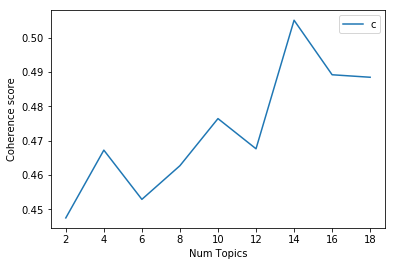

In [14]:
x = range(2, 20, 2)
plt.plot(x, coherence)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [11]:
coherence

[0.44750292300649164,
 0.46724714640276466,
 0.45290884015224814,
 0.462711638539108,
 0.47643250810235765,
 0.4676390113949173,
 0.505079248826435,
 0.4892018216958912,
 0.4884724641264384]

In [15]:
ntopics=4 #NOMBRE DE THEMATIQUES

generate_lda = True

# generate LDA model
import logging

if generate_lda:
    print("generate new LDA model")
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    ldamodel = LdaModel(corpus, num_topics=ntopics, id2word = dico,
                                           passes=2, random_state=100, per_word_topics=True)



2020-02-27 23:49:45,606 : INFO : using symmetric alpha at 0.25
2020-02-27 23:49:45,608 : INFO : using symmetric eta at 0.25
2020-02-27 23:49:45,615 : INFO : using serial LDA version on this node
2020-02-27 23:49:45,629 : INFO : running online (multi-pass) LDA training, 4 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-27 23:49:45,630 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-02-27 23:49:45,632 : INFO : PROGRESS: pass 0, at document #2000/7146


generate new LDA model


2020-02-27 23:49:47,878 : INFO : merging changes from 2000 documents into a model of 7146 documents
2020-02-27 23:49:47,885 : INFO : topic #0 (0.250): 0.006*"party" + 0.005*"city" + 0.005*"today" + 0.005*"state" + 0.003*"officials" + 0.003*"leader" + 0.003*"united" + 0.003*"country" + 0.003*"opposition" + 0.003*"minister"
2020-02-27 23:49:47,887 : INFO : topic #1 (0.250): 0.009*"party" + 0.007*"state" + 0.005*"today" + 0.004*"city" + 0.004*"former" + 0.003*"officials" + 0.003*"public" + 0.003*"mayor" + 0.003*"democratic" + 0.003*"leader"
2020-02-27 23:49:47,889 : INFO : topic #2 (0.250): 0.006*"party" + 0.006*"city" + 0.005*"state" + 0.004*"today" + 0.003*"democratic" + 0.003*"mayor" + 0.003*"soviet" + 0.003*"officials" + 0.003*"leader" + 0.003*"time"
2020-02-27 23:49:47,891 : INFO : topic #3 (0.250): 0.006*"party" + 0.005*"state" + 0.004*"today" + 0.004*"city" + 0.003*"many" + 0.003*"minister" + 0.003*"time" + 0.003*"general" + 0.003*"election" + 0.003*"first"
2020-02-27 23:49:47,892 

2020-02-27 23:50:07,881 : INFO : topic #0 (0.250): 0.007*"united" + 0.006*"military" + 0.006*"minister" + 0.005*"today" + 0.005*"party" + 0.005*"country" + 0.004*"prime" + 0.004*"states" + 0.004*"aristide" + 0.004*"officials"
2020-02-27 23:50:07,883 : INFO : topic #1 (0.250): 0.019*"city" + 0.009*"state" + 0.008*"council" + 0.008*"mayor" + 0.007*"york" + 0.005*"commission" + 0.005*"board" + 0.004*"members" + 0.004*"yesterday" + 0.004*"public"
2020-02-27 23:50:07,885 : INFO : topic #2 (0.250): 0.010*"city" + 0.010*"mayor" + 0.006*"giuliani" + 0.005*"state" + 0.005*"york" + 0.004*"dinkins" + 0.004*"first" + 0.003*"office" + 0.003*"like" + 0.003*"ms"
2020-02-27 23:50:07,886 : INFO : topic #3 (0.250): 0.014*"party" + 0.006*"yeltsin" + 0.005*"soviet" + 0.005*"parliament" + 0.005*"minister" + 0.004*"today" + 0.004*"country" + 0.004*"congress" + 0.004*"communist" + 0.003*"power"
2020-02-27 23:50:07,888 : INFO : topic diff=0.336550, rho=0.423600


In [16]:
ldamodel.show_topics(formatted=False)#AFFICHAGE DES THÉMATIQUES EXTRAITE

[(0,
  [('united', 0.006688666),
   ('military', 0.005930156),
   ('minister', 0.005596524),
   ('today', 0.0053671338),
   ('party', 0.005066848),
   ('country', 0.0049804836),
   ('prime', 0.003768504),
   ('states', 0.0037111717),
   ('aristide', 0.003601711),
   ('officials', 0.0035425674)]),
 (1,
  [('city', 0.018841833),
   ('state', 0.008798785),
   ('council', 0.007818628),
   ('mayor', 0.0077906223),
   ('york', 0.007213931),
   ('commission', 0.005218311),
   ('board', 0.005137236),
   ('members', 0.0043597985),
   ('yesterday', 0.0041427794),
   ('public', 0.003869966)]),
 (2,
  [('city', 0.009746566),
   ('mayor', 0.009560289),
   ('giuliani', 0.005985333),
   ('state', 0.0047755893),
   ('york', 0.004568377),
   ('dinkins', 0.0042434866),
   ('first', 0.0037184681),
   ('office', 0.0034703326),
   ('like', 0.003137647),
   ('ms', 0.0029991146)]),
 (3,
  [('party', 0.01360608),
   ('yeltsin', 0.0056856903),
   ('soviet', 0.004821471),
   ('parliament', 0.0047590905),
   ('m

In [93]:
Lambda=0.8 # Seuil à fixer pour diminuer les intersection 

In [209]:

ldamodel=ldamodel
corpus=corpus
texts=doc_set
article_topics_df = pd.DataFrame()

# Prendre La première thematique majorithiare et la deuxième 
i=0
for i, row in enumerate(ldamodel[corpus]):
    #print(row)            
    row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
    #print(row)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    #print(i,"len(article_topics_df)")

    for j, (topic_num, prop_topic) in enumerate(row):
        #print(j)

        if j == 0:  # => first dominant topic
            wp = ldamodel.show_topic(topic_num)
            topic_keywords_first = ", ".join([word for word, prop in wp])
            topic_num_first=topic_num
            prop_topic_first=prop_topic
            #print(j)
        else:
            if j==1:# second dominant topic
                prop_topic_second=prop_topic  
                if round(prop_topic_second,4) > Lambda:## jeter les second thematique endessous du seuil
                    #print(round(prop_topic_first,4),"*")
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords_second = ", ".join([word for word, prop in wp])
                    topic_num_second=topic_num
                else:
                    topic_num_second=ntopics # Si prop_topic_second<Lamb => scnd Topic =ntopics qui ne va pas etre
                    prop_topic_second=0      # conciderer comme une thématique et la list des mots clés vide
                    topic_keywords_second=[]                        


    article_topics_df = article_topics_df.append(pd.Series([int(topic_num_first), round(prop_topic_first,4), topic_keywords_first,int(topic_num_second), round(prop_topic_second,4), topic_keywords_second]), ignore_index=True)       
    topic_num_second=ntopics
    prop_topic_second=0
    topic_keywords_second=[]
    #print(j,"#")
                #print(i,"len(article_topics_df) :",len(article_topics_df)," j:",j)






In [210]:
# Add original text to the end of the output
titles = pd.Series(doc_titles)
dates=pd.Series(doc_dates)
article_topics_df = pd.concat([article_topics_df, titles,dates], axis=1)


In [211]:
article_topics_df.columns = ['First_Dominant_Topic', 'Perc_Contribution_First', 'Topic_Keywords_First','First_Dominant_Scnd', 'Perc_Contribution_Scnd', 'Topic_Keywords_Scnd','Title','Date']


In [244]:
article_topics_df.head(20)

,First_Dominant_Topic,Perc_Contribution_First,Topic_Keywords_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Topic_Keywords_Scnd,Title,Date
0,2.0,0.9954,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],STATE'S LEADERS ARE SWORN IN ON EVE OF '87,1987-01-01
1,2.0,0.9987,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS,1987-01-02
2,2.0,0.9858,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],ALBANY PAGEANT: POMP AND POLITICS,1987-01-02
3,2.0,0.9969,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],LUNDINE OPTIMISTIC ABOUT NEW ROLE,1987-01-02
4,1.0,0.9091,"city, state, council, mayor, york, commission,...",4.0,0.0000,[],Let's Scrap That Indefensible Board of Estimate,1987-01-02
5,1.0,0.9959,"city, state, council, mayor, york, commission,...",4.0,0.0000,[],In Lieu of the Lulu,1987-01-02
6,0.0,0.7734,"united, military, minister, today, party, coun...",4.0,0.0000,[],LEADERS AREN'T NAMED,1987-01-02
7,2.0,0.8715,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],TRANSCRIPT OF CUOMO'S INAUGURAL ADDRESS FOR HI...,1987-01-02
8,2.0,0.7900,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],"KOHL'S WRONG TAPE, AND THE CABBAGE PUN",1987-01-02
9,3.0,0.5775,"party, yeltsin, soviet, parliament, minister, ...",0.0,0.4215,"united, military, minister, today, party, coun...",BEHIND CHINA'S PROTESTS,1987-01-03


In [217]:
set((article_topics_df[article_topics_df['First_Dominant_Topic']==3]).Topic_Keywords_First)

{'party, yeltsin, soviet, parliament, minister, today, country, congress, communist, power'}

## Creer une collection de document par thémtique majoritaire

In [32]:
First_T=set(article_topics_df.First_Dominant_Topic)

topics=[t for t in First_T]
topic_docs=[pd.DataFrame() for t in First_T]
j=0
for t in topics:
    #print(t,"topic")
    for i in range(1000):   
        #if article_topics_df[i]==t:
        if (article_topics_df['First_Dominant_Topic'][i])==t or (article_topics_df['First_Dominant_Scnd'][i])==t :
            (topic_docs[int(t)]).append(article_topics_df[i:i+1])
            (topic_docs[int(t)]) = (topic_docs[int(t)]).append(article_topics_df[i:i+1], ignore_index=False)       
            
            #print(int(t),t,article_topics_df['First_Dominant_Topic'][i])

    

In [33]:
topic_docs[0]

,First_Dominant_Topic,Perc_Contribution_First,Topic_Keywords_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Topic_Keywords_Scnd,Title,Date
6,0.0,0.7733,"united, military, minister, today, party, coun...",4.0,0.0000,[],LEADERS AREN'T NAMED,1987-01-02
16,0.0,0.5356,"united, military, minister, today, party, coun...",4.0,0.0000,[],AQUINO IS WELCOMED ON CAMPAIGN TRAIL,1987-01-05
17,0.0,0.9955,"united, military, minister, today, party, coun...",4.0,0.0000,[],BEIJING POSTER ASKS A DENG REPLY,1987-01-05
20,0.0,0.9038,"united, military, minister, today, party, coun...",4.0,0.0000,[],SOLARZ MEETS WITH PHILIPPINE COMMUNIST LEADERS,1987-01-06
24,0.0,0.4649,"united, military, minister, today, party, coun...",3.0,0.4558,"party, yeltsin, soviet, parliament, minister, ...",MANILA AND REBELS REACH AGREEMENT ON TALKS,1987-01-07
27,0.0,0.9720,"united, military, minister, today, party, coun...",4.0,0.0000,[],Gabon's Cabinet Resigns,1987-01-07
31,1.0,0.4748,"city, state, council, mayor, york, commission,...",0.0,0.4693,"united, military, minister, today, party, coun...",Senate Panel's Report Omitted Bush Meeting,1987-01-08
44,0.0,0.7512,"united, military, minister, today, party, coun...",4.0,0.0000,[],CHINA OUSTS UNIVERSITY SCIENTIST WHO ADVOCATED...,1987-01-13
49,0.0,0.5275,"united, military, minister, today, party, coun...",4.0,0.0000,[],"ELECTION UNLIKELY IN '87, NICARAGUA OFFICIAL SAYS",1987-01-14
51,0.0,0.7448,"united, military, minister, today, party, coun...",4.0,0.0000,[],CHINA EXPELS A TOP SHANGHAI WRITER FROM PARTY,1987-01-15


### Création des arcs

 Data est un ensemble de noeuds source -> destination et sa couleur qui change pas pour une mm thematique 

In [35]:
colors_edges=range(ntopics)
ntopics

4

In [70]:
##création des arcs 
Data=pd.DataFrame()
for j in range(len(topic_docs)):
    for i in range((len(topic_docs[j])-1)):
        source=int((topic_docs[j][i:(i+1)]).index.values)
        dest=int((topic_docs[j][(i+1):(i+2)]).index.values)
        #print(source,dest)
        Data=Data.append(pd.Series([source,dest,(j+10),j]), ignore_index=True) 
        
        #article_topics_df = article_topics_df.append(pd.Series([int(topic_num_first), round(prop_topic_first,4), topic_keywords_first,int(topic_num_second), round(prop_topic_second,4), topic_keywords_second]), ignore_index=True)       
Data.columns = ['source', 'destination', 'color','topic']

In [63]:
Data.tail() # edges

,source,destination,color,topic
1022,972.0,979.0,23.0,3.0
1023,979.0,984.0,23.0,3.0
1024,984.0,985.0,23.0,3.0
1025,985.0,986.0,23.0,3.0
1026,986.0,993.0,23.0,3.0


### Selection des Thematiques

In [71]:
Data_copy=pd.concat([Data[Data['topic']==2],Data[Data['topic']==3]],axis=0 )

In [46]:
len(Data[Data['topic']==0]),len(Data[Data['topic']==1]),len(Data[Data['topic']==2]),len(Data[Data['topic']==3])

(333, 314, 105, 275)

### Creation du graphe

In [72]:
g = nx.Graph()
# Add edges
for i, elrow in Data_copy.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
"""# Add node attributes
for i, nlrow in nodelist.iterrows():
    #g.nodes[nlrow['id']].update(nlrow[1:].to_dict())
    print(nlrow[1:].to_dict())"""
nodes = list(g.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0
edges = list(g.edges(data=True)) # for nx 2.0, returns an "EdgeView" object rather than an iterable

labels={}
for i , nlrow in article_topics_df.iterrows():
    for n in nodes:
        if int(n)==i:
            labels[n]=(nlrow[-2])

# define the initial positions of the nodes using networkx's spring_layout function, and add to the nodes_dict.
pos = nx.spring_layout(g)
nodes_dict = [{"id":labels[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000,
              "label":n} for n in nodes]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

"""# map colors to edges based on degree
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=60)

# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":'red'} for i in range(len(edges))]"""
#"color":edges[i][2]['color']

'# map colors to edges based on degree\nedge_to_color = visJS_module.return_edge_to_color(g,field_to_map=\'color\',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,\n                        vmin=0,vmax=60)\n\n# per edge attributes\nedges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], \n              "color":\'red\'} for i in range(len(edges))]'

In [57]:
(edges[2][2]['color'])

12.0

In [73]:
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 0.40, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=20)
#edge_to_color[(edges[0][0],edges[0][1])]
# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":edge_to_color[(edges[i][0],edges[i][1])]} for i in range(len(edges))]

## Affichage de notre metromap pour les documents

In [140]:
"""visJS2jupyter.visJS_module.visjs_network(nodes_dict,
                                         edges_dict,
                                         edge_arrow_to=True,
                                         edge_width=20,
                                         node_size_multiplier=20,
                                         physics_enabled=True,
                                         min_velocity=1,
                                         max_velocity=20,
                                         min_label_size=20,
                                         max_label_size=35,
                                         graph_title = 'Metro Map for documents belonging to topic 2 and 3'+' '
                                        
                                        
                                            
                                        )"""
## pour l'affichege de ce graphe il faux enlever l'affichage du mm type de graphe par raport au clusters 
## pour avoir une vison plus clair de l'evolution d'une thématique agrandir le graphe apres l'avoir executé 
## ça permet d'afficher les titres de chaque noeudx , sinn en cliquant sur le neoud

"visJS2jupyter.visJS_module.visjs_network(nodes_dict,\n                                         edges_dict,\n                                         edge_arrow_to=True,\n                                         edge_width=20,\n                                         node_size_multiplier=20,\n                                         physics_enabled=True,\n                                         min_velocity=1,\n                                         max_velocity=20,\n                                         min_label_size=20,\n                                         max_label_size=35,\n                                         graph_title = 'Metro Map for documents belonging to topic 2 and 3'+' '\n                                        \n                                        \n                                            \n                                        )"

In [75]:
df2=pd.concat([df.second_classifier,article_topics_df.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','Perc_Contribution_Scnd','Date','Title']]],axis=1)

In [76]:
df2.head()

,second_classifier,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Date,Title
0,LIEUTENANT GOVERNORS (US),2.0,0.9954,4.0,0.0,1987-01-01,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,INAUGURATIONS,2.0,0.9987,4.0,0.0,1987-01-02,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,INAUGURATIONS,2.0,0.9859,4.0,0.0,1987-01-02,ALBANY PAGEANT: POMP AND POLITICS
3,LIEUTENANT GOVERNORS (US),2.0,0.9969,4.0,0.0,1987-01-02,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,Letter,1.0,0.9094,4.0,0.0,1987-01-02,Let's Scrap That Indefensible Board of Estimate


In [77]:
df2.tail()

,second_classifier,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Date,Title
7141,Letter,3.0,0.8418,4.0,0.0,1994-07-01,Before We Applaud France's Mission to Rwanda;R...
7142,NEWS AND NEWS MEDIA,2.0,0.6248,4.0,0.0,1994-07-01,Deputy Mayor's Remark Draws Racial Fire
7143,ELECTIONS,3.0,0.9989,4.0,0.0,1994-07-01,Japan's Realignment: Reformers Remain Confident
7144,Top/News,3.0,0.9928,4.0,0.0,1994-07-02,Party in Italy Picks Leader
7145,ELECTIONS,2.0,0.9991,4.0,0.0,1994-07-02,"Bland but Tough, Gov. Wilson Uses Lessons of N..."


## Preparation des variables pour le clustering 

### Calcul de la date continue (Nombre de jour par rapport à today

In [79]:
import time 
from datetime import datetime,timedelta
import datetime as dt
from datetime import date
data={'col':['Number of Days']}
ColumnList=pd.DataFrame(data=data)
dates=df2[['Date']]
today=date(2020,2,18)
for i in range(len(df2[['Date']])):
    tdate=(datetime.strptime(dates.iloc[i][0],'%Y-%m-%d').date())
    NumDays=(today-tdate).days
    dates.set_value(i,ColumnList.iloc[0][0],NumDays)
    #print(dates.iloc[i])
    print(i,tdate,NumDays)

dates.tail()
#len(dates)
#ColumnList.iloc[0]

,Date,Number of Days
7141,1994-07-01,9363.0
7142,1994-07-01,9363.0
7143,1994-07-01,9363.0
7144,1994-07-02,9362.0
7145,1994-07-02,9362.0


In [222]:
df3=df2.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','second_classifier']]
df3=pd.concat([df3,dates.loc[:,['Number of Days']]],axis=1)

df2.head()

,second_classifier,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Date,Title
0,LIEUTENANT GOVERNORS (US),2.0,0.9954,4.0,0.0,1987-01-01,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,INAUGURATIONS,2.0,0.9987,4.0,0.0,1987-01-02,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,INAUGURATIONS,2.0,0.9859,4.0,0.0,1987-01-02,ALBANY PAGEANT: POMP AND POLITICS
3,LIEUTENANT GOVERNORS (US),2.0,0.9969,4.0,0.0,1987-01-02,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,Letter,1.0,0.9094,4.0,0.0,1987-01-02,Let's Scrap That Indefensible Board of Estimate


In [225]:
# Add original text to the end of the output
#Number_days=pd.Series(dates.loc[:,['Number of Days']])
#df3 = pd.concat([article_topics_df, titles,dates], axis=1)
#df3=df3[df3.second_classifier==' ETHICS']


In [226]:
df3.tail()

,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,second_classifier,Number of Days
7141,3.0,0.8418,4.0,Letter,9363.0
7142,2.0,0.6248,4.0,NEWS AND NEWS MEDIA,9363.0
7143,3.0,0.9989,4.0,ELECTIONS,9363.0
7144,3.0,0.9928,4.0,Top/News,9362.0
7145,2.0,0.9991,4.0,ELECTIONS,9362.0


In [59]:
len(df3)

7146

In [82]:
#df4=df3.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','Perc_Contribution_Scnd','Number of Days']]
df4=df3.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','Number of Days']]

In [83]:
df4.tail()

,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Number of Days
7141,3.0,0.8418,4.0,9363.0
7142,2.0,0.6248,4.0,9363.0
7143,3.0,0.9989,4.0,9363.0
7144,3.0,0.9928,4.0,9362.0
7145,2.0,0.9991,4.0,9362.0


# Determination du nombre de clusters en utilisant elbow

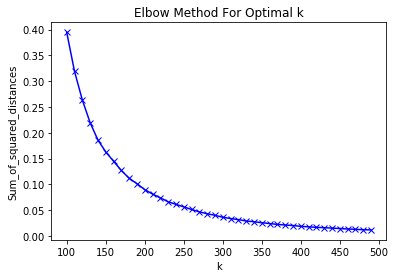

In [85]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(100,500,10)
for k in K:#nombre de clusters

    
    ###
    df4_copy=df4
    kmeans = KMeans(n_clusters=k)
    X = np.array((df4_copy.drop (['Number of Days'], 1))).astype(float)#observations
    Y = np.array(df4_copy['Number of Days'].astype(float))#poids
    wt_kmeansclus = kmeans.fit(X[0:,],sample_weight = Y[0:])
    predicted_kmeans = kmeans.predict(X[0:,], sample_weight = Y[0:])
    Sum_of_squared_distances.append(wt_kmeansclus.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Application d'un clustering Kmeans biaisé par les dates sur nos observations

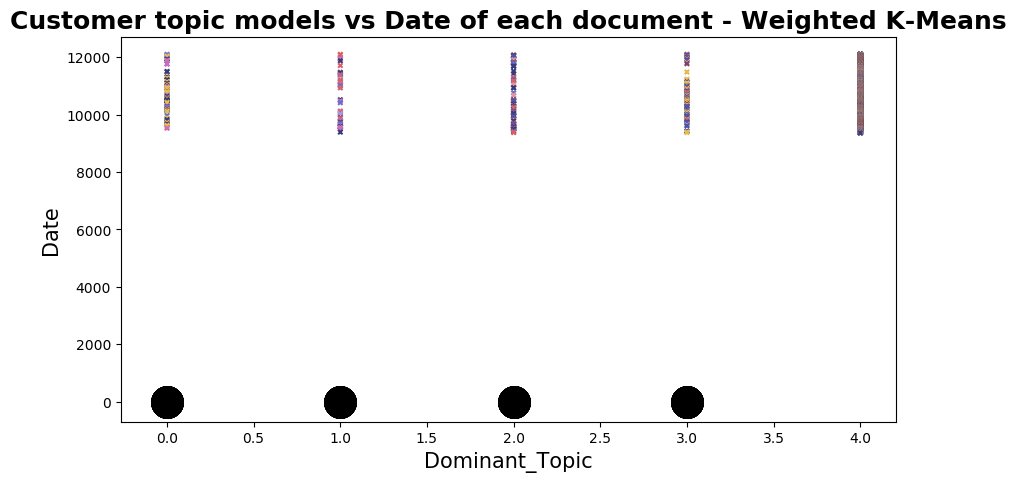

In [148]:
df4_copy=df4
kmeans = KMeans(n_clusters=150,  max_iter=1000)
X = np.array(df4_copy.drop (['Number of Days'], 1)).astype(float)
Y = np.array(df4_copy['Number of Days'].astype(float))
wt_kmeansclus = kmeans.fit(X[0:,],sample_weight = Y[0:])
predicted_kmeans = kmeans.predict(X[0:,], sample_weight = Y[0:])
plt.style.use('default')
plt.figure(figsize=(10, 5))
plt.scatter(X[0:,2], Y[0:], c=wt_kmeansclus.labels_.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer topic models vs Date of each document - Weighted K-Means',fontsize=18, fontweight='bold')
plt.xlabel('Dominant_Topic',fontsize=15)
plt.ylabel('Date',fontsize=15)
centers = wt_kmeansclus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [155]:
## creation d'une nouvelle dataframe contenant le cluster attribué  
d1=df3
d2=pd.Series(wt_kmeansclus.labels_)
Titles=df2.loc[:,['Title']]
df6= pd.concat([d1.reset_index(drop=True), d2.reset_index(drop=True),Titles.reset_index(drop=True)], axis=1, ignore_index=True )
columns=list(df3.columns)
columns.append("Cluster")
columns.append("Title")


In [157]:
df6.columns=columns
df6.head()


,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,second_classifier,Number of Days,Cluster,Title
0,2.0,0.9954,4.0,LIEUTENANT GOVERNORS (US),12101.0,1,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,2.0,0.9987,4.0,INAUGURATIONS,12100.0,1,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,2.0,0.9859,4.0,INAUGURATIONS,12100.0,142,ALBANY PAGEANT: POMP AND POLITICS
3,2.0,0.9969,4.0,LIEUTENANT GOVERNORS (US),12100.0,1,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,1.0,0.9094,4.0,Letter,12100.0,92,Let's Scrap That Indefensible Board of Estimate


## Création de neoudx à partir des clusters sur un echantillion d'articles relativ à un Classifier choisit(ETHICS) :

In [ ]:
clusters=[pd.DataFrame() for i in set(wt_kmeansclus.labels_)]

for i in range(len(df6)):
    for j in range(len(set(wt_kmeansclus.labels_))):
        if int(df6.iloc[i][5])==j:
            #print(i,j,int(df6.iloc[i][5]))
            clusters[j]=(clusters[j]).append(df6[i:i+1],ignore_index=False)
            #print(clusters[j])
        


In [162]:
df6.iloc[i][0]

,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,second_classifier,Number of Days,Cluster,Title
0,2.0,0.9954,4.0,LIEUTENANT GOVERNORS (US),12101.0,1,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,2.0,0.9987,4.0,INAUGURATIONS,12100.0,1,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,2.0,0.9859,4.0,INAUGURATIONS,12100.0,142,ALBANY PAGEANT: POMP AND POLITICS
3,2.0,0.9969,4.0,LIEUTENANT GOVERNORS (US),12100.0,1,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,1.0,0.9094,4.0,Letter,12100.0,92,Let's Scrap That Indefensible Board of Estimate


In [112]:
d=clusters[0]['Number of Days']
d.mean()# date moyenne du cluster

10493.021739130434

In [ ]:
Lambda=0.6

In [1198]:
grouped = c.groupby('First_Dominant_Topic')
Mean_grouped=grouped['Perc_Contribution_First'].agg(np.mean)
Sorted_mean_grouped=(Mean_grouped.sort_values(ascending=False))
First_two_mean_grouped=(Sorted_mean_grouped[:2]).to_dict()
values_two_mean_grouped=list(First_two_mean_grouped.values())
if values_two_mean_grouped[1] < Lambda:
    First_two_mean_grouped.popitem()
print((First_two_mean_grouped))

{11.0: 0.9049636342308738, 16.0: 0.7888000011444092, 6.0: 0.7758285786424365, 8.0: 0.6427000164985657, 2.0: 0.5249999761581421}


In [113]:
clusters_copy=clusters
for i in range(len(clusters)):
    #print(i,len(set((clusters[i])['First_Dominant_Topic'])),set((clusters[i])['First_Dominant_Topic']),len(clusters[i]))
#########
    cluster_temp=pd.DataFrame()
    Dic_cluster={}
    c=clusters[i]
    grouped = c.groupby('First_Dominant_Topic')# grouper les elms du cluster i par thématique (chaque cluster peut contenir plusieurs thématiques
    Mean_grouped=grouped['Perc_Contribution_First'].agg(np.mean) # calculer la moyenne du pourcentage de contribution 
    # de chaque group afin de trier ces elm en utilisant cette moyenne 
    Sorted_mean_grouped=(Mean_grouped.sort_values(ascending=False))
    First_two_mean_grouped=(Sorted_mean_grouped[:]).to_dict()
    values_two_mean_grouped=list(First_two_mean_grouped.values())

    #print((First_two_mean_grouped))
    ## extraction de la première thématique et de la deuxième (si elle deppasse Lambda)
    Dic_cluster[(list(First_two_mean_grouped))[0]]=values_two_mean_grouped[0]
    if len(values_two_mean_grouped)>1:
        if(values_two_mean_grouped[1]>Lambda):
            Dic_cluster[(list(First_two_mean_grouped))[1]]=values_two_mean_grouped[1]

    cluster_temp=clusters[i][(clusters[i]).First_Dominant_Topic==((list(Dic_cluster))[0])]
    if(len(list(Dic_cluster))>1):
        cluster_temp=cluster_temp.append(clusters[i][(clusters[i]).First_Dominant_Topic==((list(Dic_cluster))[1])],ignore_index=True)

        #print(len(First_two_mean_grouped))
    #print(list(Dic_cluster),Dic_cluster)

#    print(clusters[i])
    clusters[i]=cluster_temp
#    print("#")
#    print(clusters[i])

 
########
    #print(i,len(set((clusters[i])['First_Dominant_Topic'])),set((clusters[i])['First_Dominant_Topic']),len(clusters[i]))

In [116]:
set(clusters[9]['First_Dominant_Topic'])

{3.0}

## Creation des Noeudx :
groupement des clusters par thématuqe 
    
(première et deuxime si elle est prise à travers lambda)

In [119]:
#Get only the topics that are used
First_T_cluster=[]
for j in range(len(clusters)):
    for k in ((set(list(clusters[j]['First_Dominant_Topic'])))):
              First_T_cluster.append(k)


First_T_cluster=set(First_T_cluster)
topics=[int(t) for t in First_T_cluster]
topic_clusters=[[] for t in range(1+max(topics))]
 
j=0
for t in topics:
    #print(t,"topic")
    for i in range(len(clusters)):   

        #if article_topics_df[i]==t:
        for j in set(clusters[i]['First_Dominant_Topic']):
            if j==t :
                print(i,"CLuster",j,"=",t,"topic1")
                (topic_clusters[int(t)]).append(i)
        for j in set(clusters[i]['First_Dominant_Scnd']):
            if j==t :
                print(i,"CLuster",j,"=",t,"topic2")
                (topic_clusters[int(t)]).append(i)
        

                #(topic_clusters[int(t)]).append(clusters[i],ignore_index=False)
    print("Cluster:",i,"####","topic: ",t,"\n",topic_clusters[int(t)])

            #print(int(t),t,article_topics_df['First_Dominant_Topic'][i])

   


1 CLuster 0.0 = 0 topic1
2 CLuster 0.0 = 0 topic2
8 CLuster 0.0 = 0 topic1
10 CLuster 0.0 = 0 topic1
14 CLuster 0.0 = 0 topic1
16 CLuster 0.0 = 0 topic2
18 CLuster 0.0 = 0 topic1
20 CLuster 0.0 = 0 topic1
21 CLuster 0.0 = 0 topic1
22 CLuster 0.0 = 0 topic2
31 CLuster 0.0 = 0 topic1
32 CLuster 0.0 = 0 topic1
36 CLuster 0.0 = 0 topic1
39 CLuster 0.0 = 0 topic1
40 CLuster 0.0 = 0 topic1
45 CLuster 0.0 = 0 topic1
48 CLuster 0.0 = 0 topic1
56 CLuster 0.0 = 0 topic1
58 CLuster 0.0 = 0 topic1
59 CLuster 0.0 = 0 topic1
62 CLuster 0.0 = 0 topic1
68 CLuster 0.0 = 0 topic1
71 CLuster 0.0 = 0 topic1
73 CLuster 0.0 = 0 topic1
75 CLuster 0.0 = 0 topic1
76 CLuster 0.0 = 0 topic1
79 CLuster 0.0 = 0 topic1
80 CLuster 0.0 = 0 topic1
81 CLuster 0.0 = 0 topic1
85 CLuster 0.0 = 0 topic2
93 CLuster 0.0 = 0 topic1
97 CLuster 0.0 = 0 topic1
107 CLuster 0.0 = 0 topic1
110 CLuster 0.0 = 0 topic1
115 CLuster 0.0 = 0 topic1
118 CLuster 0.0 = 0 topic2
123 CLuster 0.0 = 0 topic1
124 CLuster 0.0 = 0 topic2
125 CLust

## Trie des noeudx  par date moyenne du cluster

In [ ]:
topic_clusters## cluster par topic
topic_cluster_dic=[{} for i in range(len(topic_clusters))]## ordonner les cluster par Date moyenne de chaqun 
#au sein de chaque thematique
for i in range(len(topic_clusters)):
    if len(topic_clusters[i])>0:
        for j in ((topic_clusters[i])):
            d=((clusters[j]).iloc[:,-2])
            #clusters[j]['Number of Days'][0]
            #print(j)
            topic_cluster_dic[i][j]=d.mean()
            #print(i,"#topic",j,"#cluster",d.mean(),"Date")
            
            
    topic_cluster_dic[i]=sorted((topic_cluster_dic[i]).items(), key=lambda x: x[1])





In [128]:
len(topic_clusters),len(topic_cluster_dic)
#topic_cluster_dic[0][0][0]
#topic_clusters[0][0]
for i in range(len(topic_cluster_dic)):
    #print(len(topic_cluster_dic[i]),len(topic_clusters[i]))
    for j in range(len(topic_cluster_dic[i])):
        topic_clusters[i][j]=topic_cluster_dic[i][j][0]


In [2]:
#topic_cluster_dic[0],topic_clusters[0]# test sur le trie

## Création des arcs au sein de chaque thématique

In [184]:
Edge_topics_colors=range(ntopics)
Edge_topics=pd.DataFrame()
for j in range(len(topic_clusters)):
    print("Topic:",topic_clusters[j])
    for i in range((len(topic_clusters[j])-1)):
        source=((topic_clusters[j][i]))
        dest=((topic_clusters[j][(i+1)]))
        print(source,dest)
        Edge_topics=Edge_topics.append(pd.Series([source,dest,(j*10),j]), ignore_index=True) 
    print("# next topic")

Edge_topics.columns = ['source', 'destination', 'color','topic']        
        #article_topics_df = article_topics_df.append(pd.Series([int(topic_num_first), round(prop_topic_first,4), topic_keywords_first,int(topic_num_second), round(prop_topic_second,4), topic_keywords_second]), ignore_index=True)       
#Data.columns = ['source', 'destination', 'color','topic']
    

Edge_topics.head()

,source,destination,color,topic
0,246.0,261.0,10.0,0.0
1,261.0,166.0,10.0,0.0
2,166.0,2.0,10.0,0.0
3,2.0,158.0,10.0,0.0
4,158.0,62.0,10.0,0.0


In [194]:
Edge_topics_copy=pd.concat([Edge_topics[Edge_topics['topic']==2],Edge_topics[Edge_topics['topic']==1]],axis=0 )
#Edge_topics_copy=Edge_topics

In [142]:
len(Edge_topics[Edge_topics['topic']==0]),len(Edge_topics[Edge_topics['topic']==1]),len(Edge_topics[Edge_topics['topic']==2]),len(Edge_topics[Edge_topics['topic']==3])

(93, 67, 83, 95)

In [199]:
Edge_topics_copy[Edge_topics_copy.topic==2].head()

,source,destination,color,topic
160,246.0,261.0,20.0,2.0
161,261.0,181.0,20.0,2.0
162,181.0,78.0,20.0,2.0
163,78.0,247.0,20.0,2.0
164,247.0,52.0,20.0,2.0


## Construction du graphe

In [200]:
g = nx.Graph()
# Add edges
for i, elrow in Edge_topics_copy.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
"""# Add node attributes
for i, nlrow in nodelist.iterrows():
    #g.nodes[nlrow['id']].update(nlrow[1:].to_dict())
    print(nlrow[1:].to_dict())"""
nodes = list(g.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0
edges = list(g.edges(data=True)) # for nx 2.0, returns an "EdgeView" object rather than an iterable

"""labels={}
for i , nlrow in article_topics_df.iterrows():
    for n in nodes:
        if int(n)==i:
            labels[n]=(nlrow[-2])"""

# define the initial positions of the nodes using networkx's spring_layout function, and add to the nodes_dict.
pos = nx.spring_layout(g)
nodes_dict = [{"id":n,#labels[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000,
              "label":n} for n in nodes]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

"""# map colors to edges based on degree
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=60)

# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":'red'} for i in range(len(edges))]"""
#"color":edges[i][2]['color']
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=60)
#edge_to_color[(edges[0][0],edges[0][1])]
# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":edge_to_color[(edges[i][0],edges[i][1])]} for i in range(len(edges))]

## Affichage de la metromap pour les cluster appartenant au topic 1 et 2

In [243]:
visJS2jupyter.visJS_module.visjs_network(nodes_dict,
                                         edges_dict,
                                         edge_arrow_to=True,
                                         edge_width=20,
                                         node_size_multiplier=20,
                                         physics_enabled=True,
                                         min_velocity=1,
                                         max_velocity=20,
                                         min_label_size=20,
                                         max_label_size=35,
                                         graph_title = 'Metro Map for cluster of documents belonging to Topic 1 and 2'
                                        
                                        
                                            
)

"visJS2jupyter.visJS_module.visjs_network(nodes_dict,\n                                         edges_dict,\n                                         edge_arrow_to=True,\n                                         edge_width=20,\n                                         node_size_multiplier=20,\n                                         physics_enabled=True,\n                                         min_velocity=1,\n                                         max_velocity=20,\n                                         min_label_size=20,\n                                         max_label_size=35,\n                                         graph_title = 'Metro Map for cluster of documents belonging to Topic 1 and 2'\n                                        \n                                        \n                                            \n)"